# Trials:

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping
from transformers import BertTokenizer, TFBertModel
from tensorflow.keras.layers import Input, Dense, Concatenate, Flatten
from tensorflow.keras.models import Model

In [ ]:
# Load your dataset (replace 'your_dataset.csv' with your actual dataset)
# Assuming your dataset has columns: 'Temperature', 'Vibration_X', 'Vibration_Y', 'Vibration_Z', and 'Target'
# dataset = pd.read_csv("data_1.csv")
dataset = pd.read_csv("/content/drive/MyDrive/V Sem7/End-Sem Project/Data/Material 1/data_1.csv")

# Extract features and target variable
X = dataset[["Temperature", "Vibration_X", "Vibration_Y", "Vibration_Z"]].values

#  Confusion here is with the 'target' value... letss see
# y = dataset["Target"].values
y = dataset["Temperature"].values


print(X)
print('------------------------')
print(y)

[[   26.84    -2.68    23.09 -1014.33]
 [   30.19   -23.72    23.3  -1011.56]
 [   29.48     1.24    19.01 -1012.23]
 ...
 [   28.08    -8.38    31.9  -1024.12]
 [   27.01    -1.48    19.46 -1019.94]
 [   25.69   -23.31    26.69 -1028.95]]
------------------------
[26.84 30.19 29.48 ... 28.08 27.01 25.69]


In [ ]:
# Normalize the features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
X_train_3d = np.reshape(X_train_scaled, (X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))


In [ ]:
X_train_3d

array([[[0.78473091, 0.06742323, 0.50016683, 0.04126984]],

       [[0.17897372, 0.06909212, 0.75008342, 0.2037037 ]],

       [[0.79474343, 0.6975968 , 0.00734067, 0.31693122]],

       ...,

       [[0.89111389, 0.3411215 , 0.95762429, 0.12010582]],

       [[0.54443054, 0.34445928, 0.67600934, 0.61851852]],

       [[0.61451815, 0.12917223, 0.40707374, 0.02433862]]])

In [ ]:
# LSTM Model
model_lstm = Sequential()
model_lstm.add(LSTM(50, input_shape=(X_train_3d.shape[1], X_train_3d.shape[2])))
model_lstm.add(Dense(1))
model_lstm.compile(optimizer="adam", loss="mean_squared_error")


In [ ]:
# Fit the LSTM model
model_lstm.fit(X_train_3d, y_train, epochs=100, batch_size=32)

Epoch 1/100
30/30 [==============================] - 2s 2ms/step - loss: 843.5424
Epoch 2/100
30/30 [==============================] - 0s 2ms/step - loss: 827.1457
Epoch 3/100
30/30 [==============================] - 0s 2ms/step - loss: 801.6179
Epoch 4/100
30/30 [==============================] - 0s 2ms/step - loss: 761.3638
Epoch 5/100
30/30 [==============================] - 0s 3ms/step - loss: 704.5815
Epoch 6/100
30/30 [==============================] - 0s 2ms/step - loss: 633.7591
Epoch 7/100
30/30 [==============================] - 0s 3ms/step - loss: 554.7485
Epoch 8/100
30/30 [==============================] - 0s 2ms/step - loss: 473.8095
Epoch 9/100
30/30 [==============================] - 0s 3ms/step - loss: 397.0703
Epoch 10/100
30/30 [==============================] - 0s 3ms/step - loss: 327.4947
Epoch 11/100
30/30 [==============================] - 0s 2ms/step - loss: 266.7822
Epoch 12/100
30/30 [==============================] - 0s 2ms/step - loss: 215.1898
Epoch 13/100


In [ ]:
# Predict using the trained model (adjust X_test accordingly)
X_test_3d = np.reshape(X_test_scaled, (X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))
y_pred = model_lstm.predict(X_test_3d)

8/8 [==============================] - 1s 3ms/step


In [ ]:
# Evaluate the model (use appropriate evaluation metrics based on your problem)
loss = model_lstm.evaluate(X_test_3d, y_test)
print(f"Test Loss: {loss}")

8/8 [==============================] - 0s 3ms/step - loss: 3.2118
Test Loss: 3.2117719650268555


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Define the Transformer model
class TransformerModel(tf.keras.Model):
    def __init__(self, embed_dim, num_heads, ff_dim, num_blocks, input_length):
        super(TransformerModel, self).__init__()
        self.embed_dim = embed_dim
        self.num_heads = num_heads
        self.ff_dim = ff_dim
        self.num_blocks = num_blocks
        self.input_length = input_length

        self.embedding = layers.Embedding(input_dim=input_length, output_dim=embed_dim)
        self.transformer_blocks = [TransformerBlock(embed_dim, num_heads, ff_dim) for _ in range(num_blocks)]
        self.reshape = layers.Reshape((-1, embed_dim))
        self.fc = layers.Dense(1)

    def call(self, inputs):
        x = self.embedding(inputs)
        x = self.reshape(x)

        for i in range(self.num_blocks):
            x = self.transformer_blocks[i](x)

        x = self.fc(x)
        return x

# Define the TransformerBlock layer
class TransformerBlock(tf.keras.layers.Layer):
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.1):
        super(TransformerBlock, self).__init__()
        self.att = layers.MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)
        self.ffn = keras.Sequential(
            [layers.Dense(ff_dim, activation="relu"), layers.Dense(embed_dim)]
        )
        self.layernorm1 = layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = layers.LayerNormalization(epsilon=1e-6)
        self.dropout1 = layers.Dropout(rate)
        self.dropout2 = layers.Dropout(rate)

    def call(self, inputs):
        attn_output = self.att(inputs, inputs)
        attn_output = self.dropout1(attn_output)
        out1 = self.layernorm1(inputs + attn_output)

        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output)
        return self.layernorm2(out1 + ffn_output)

# Set hyperparameters
embed_dim = 32  # Embedding dimension
num_heads = 2   # Number of attention heads
ff_dim = 32     # Hidden layer size in feedforward network inside transformer
num_blocks = 4  # Number of transformer blocks
input_length = 50  # Assuming your input sequence length

# Instantiate the model
model_transformer = TransformerModel(embed_dim, num_heads, ff_dim, num_blocks, input_length)

# Compile the model
model_transformer.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss="mean_squared_error")

model_transformer.build((None, input_length))

# Display the model summary
model_transformer.summary()

# Train the model (assuming you have X_train and y_train)
# model_transformer.fit(X_train, y_train, epochs=num_epochs, batch_size=batch_size)


Model: "transformer_model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     multiple                  1600      
                                                                 
 transformer_block_8 (Trans  multiple                  10656     
 formerBlock)                                                    
                                                                 
 transformer_block_9 (Trans  multiple                  10656     
 formerBlock)                                                    
                                                                 
 transformer_block_10 (Tran  multiple                  10656     
 sformerBlock)                                                   
                                                                 
 transformer_block_11 (Tran  multiple                  10656     
 sformerBlock)                                 

In [ ]:
# Assuming X_test is your test input data
X_test = X_test_3d

# Convert X_test to numpy array
X_test = np.array(X_test)

# Add an extra dimension to match the model input shape
X_test = np.expand_dims(X_test, axis=0)

# Make predictions using the Transformer model
predictions = model_transformer.predict(X_test)

# Display the predictions
print("Predictions:")
print(predictions)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Predicted Temperature on the 11th day: 21.718965517241383
Mean Squared Error on Test Set: 0.8347577288941795


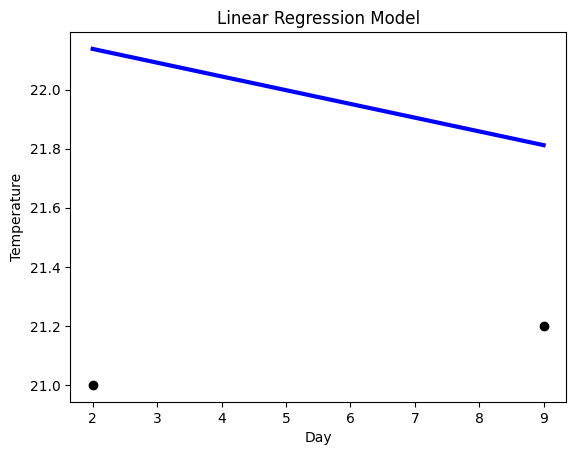

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Assuming you have a DataFrame with temperature data for the past 10 days
# Replace this with your actual DataFrame or data source
data = {
    'Day': np.arange(1, 11),
    'Temperature': [20.5, 21.0, 22.5, 23.0, 22.8, 22.7, 22.0, 21.5, 21.2, 20.8]
}

df = pd.DataFrame(data)

# Split the data into features (X) and target variable (y)
X = df[['Day']]
y = df['Temperature']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Predict the temperature on the 11th day
day_11_prediction = model.predict([[11]])

print(f"Predicted Temperature on the 11th day: {day_11_prediction[0]}")

# Evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error on Test Set: {mse}")

# Plot the regression line
plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)
plt.xlabel('Day')
plt.ylabel('Temperature')
plt.title('Linear Regression Model')
plt.show()



In [8]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Assuming you have a DataFrame with vibration and temperature data for the past 10 days
# Replace this with your actual DataFrame or data source
# Here, 'Vibration_X', 'Vibration_Y', 'Vibration_Z' are the vibration features
# 'Temperature' is the target variable
data = {
    'Vibration_X': np.random.rand(1200),
    'Vibration_Y': np.random.rand(1200),
    'Vibration_Z': np.random.rand(1200),
    'Temperature': np.random.rand(1200)
}

df = pd.DataFrame(data)

# Split the data into features (X) and target variable (y)
X = df[['Vibration_X', 'Vibration_Y', 'Vibration_Z']]
y = df['Temperature']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a multivariate linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Predict the temperature on the 11th day based on vibration data
# Replace this with the actual vibration data for the 11th day
vibration_11th_day = np.random.rand(1, 3)  # Assuming 3 features for vibration
temperature_11th_day_prediction = model.predict(vibration_11th_day)

print(f"Predicted Temperature on the 11th day: {temperature_11th_day_prediction[0]}")

# Evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error on Test Set: {mse}")


Predicted Temperature on the 11th day: 0.47941646923128584
Mean Squared Error on Test Set: 0.07562608871647723


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [10]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Assuming you have a DataFrame with vibration and temperature data for the past 10 days
# Replace this with your actual DataFrame or data source
# Here, 'Vibration_X', 'Vibration_Y', 'Vibration_Z' are the vibration features
# 'Temperature' is the target variable
data = {
    'Temperature': [26.84, 30.19, 29.48, 31.76, 25.93, 27.45, 31.92, 31.71, 31.83, 29.37, 28.07, 26.27, 26.96, 28.39, 31.53],
    'Vibration_X': [-2.68, -23.72, 1.24, -13.17, -13.71, -2.78, -7.38, -0.67, -11.12, -11.81, -18.92, -22.18, -11.35, -0.69, 3.73],
    'Vibration_Y': [23.09, 23.3, 19.01, 21.69, 21.47, 27.26, 24.9, 5.46, 32.04, 19.66, 29.78, 14.3, 14.83, 17.6, 12.25],
    'Vibration_Z': [-1014.33, -1011.56, -1012.23, -1018.05, -1016.73, -1025.36, -1024.68, -1018.47, -1016.76, -1028.73, -1026.08, -1020.9, -1019.04, -1021.89, -1021.73]
}

df = pd.DataFrame(data)

# Split the data into features (X) and target variables (y_vibration, y_temperature)
X = df[['Vibration_X', 'Vibration_Y', 'Vibration_Z']]
y_vibration = X  # Assuming vibration values are similar to the input features
y_temperature = df['Temperature']

# Create separate models for vibration and temperature
model_vibration = LinearRegression()
model_temperature = LinearRegression()

# Train the models
model_vibration.fit(X, y_vibration)
model_temperature.fit(X, y_temperature)

# Predict the vibration and temperature for the 11th day based on the trained models
# Do not provide actual data for the 11th day
vibration_11th_day_prediction = model_vibration.predict(X.iloc[[-1]])  # Use the features of the last available day
temperature_11th_day_prediction = model_temperature.predict(X.iloc[[-1]])  # Use the features of the last available day

print(f"Predicted Vibration on the 11th day: {vibration_11th_day_prediction[0]}")
print(f"Predicted Temperature on the 11th day: {temperature_11th_day_prediction[0]}")


Predicted Vibration on the 11th day: [    3.73    12.25 -1021.73]
Predicted Temperature on the 11th day: 29.870298427069844


In [11]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Assuming you have a DataFrame with vibration and temperature data for the past 10 days
# Replace this with your actual DataFrame or data source
# Here, 'Vibration_X', 'Vibration_Y', 'Vibration_Z' are the vibration features
# 'Temperature' is the target variable
data = {
    'Temperature': [26.84, 30.19, 29.48, 31.76, 25.93, 27.45, 31.92, 31.71, 31.83, 29.37, 28.07, 26.27, 26.96, 28.39, 31.53],
    'Vibration_X': [-2.68, -23.72, 1.24, -13.17, -13.71, -2.78, -7.38, -0.67, -11.12, -11.81, -18.92, -22.18, -11.35, -0.69, 3.73],
    'Vibration_Y': [23.09, 23.3, 19.01, 21.69, 21.47, 27.26, 24.9, 5.46, 32.04, 19.66, 29.78, 14.3, 14.83, 17.6, 12.25],
    'Vibration_Z': [-1014.33, -1011.56, -1012.23, -1018.05, -1016.73, -1025.36, -1024.68, -1018.47, -1016.76, -1028.73, -1026.08, -1020.9, -1019.04, -1021.89, -1021.73]
}

df = pd.DataFrame(data)

# Split the data into features (X) and target variables (y_vibration, y_temperature)
X = df[['Vibration_X', 'Vibration_Y', 'Vibration_Z']]
y_vibration = X  # Assuming vibration values are similar to the input features
y_temperature = df['Temperature']

# Create separate models for vibration and temperature
model_vibration = LinearRegression()
model_temperature = LinearRegression()

# Train the models
model_vibration.fit(X, y_vibration)
model_temperature.fit(X, y_temperature)

# Predict the vibration and temperature for the 11th day based on the trained models
# Do not provide actual data for the 11th day
vibration_11th_day_prediction = model_vibration.predict(X.iloc[[-1]])  # Use the features of the last available day
temperature_11th_day_prediction = model_temperature.predict(X.iloc[[-1]])  # Use the features of the last available day

# Actual values for the 11th day
actual_vibration_11th_day = np.array([[-2.51,5,-1021]])  # Replace with the actual values
actual_temperature_11th_day = 31.51  # Replace with the actual value

# Calculate errors
vibration_error = np.abs(vibration_11th_day_prediction[0] - actual_vibration_11th_day)
temperature_error = np.abs(temperature_11th_day_prediction[0] - actual_temperature_11th_day)

# Display results
print("Actual Vibration on the 11th day:", actual_vibration_11th_day)
print("Predicted Vibration on the 11th day:", vibration_11th_day_prediction[0])
print("Vibration Error for the 11th day:", vibration_error)

print("\nActual Temperature on the 11th day:", actual_temperature_11th_day)
print("Predicted Temperature on the 11th day:", temperature_11th_day_prediction[0])
print("Temperature Error for the 11th day:", temperature_error)


Actual Vibration on the 11th day: [[   -2.51     5.   -1021.  ]]
Predicted Vibration on the 11th day: [    3.73    12.25 -1021.73]
Vibration Error for the 11th day: [[6.24 7.25 0.73]]

Actual Temperature on the 11th day: 31.51
Predicted Temperature on the 11th day: 29.870298427069844
Temperature Error for the 11th day: 1.6397015729301572


--------------------------------------------------------------------

# Trying logic:

In [30]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load the dataset
data = {
    'Temperature': [26.84, 30.19, 29.48, 31.76, 25.93, 27.45, 31.92, 31.71, 31.83, 29.37, 28.07, 26.27, 26.96, 28.39, 31.53],
    'Vibration_X': [-2.68, -23.72, 1.24, -13.17, -13.71, -2.78, -7.38, -0.67, -11.12, -11.81, -18.92, -22.18, -11.35, -0.69, 3.73],
    'Vibration_Y': [23.09, 23.3, 19.01, 21.69, 21.47, 27.26, 24.9, 5.46, 32.04, 19.66, 29.78, 14.3, 14.83, 17.6, 12.25],
    'Vibration_Z': [-1014.33, -1011.56, -1012.23, -1018.05, -1016.73, -1025.36, -1024.68, -1018.47, -1016.76, -1028.73, -1026.08, -1020.9, -1019.04, -1021.89, -1021.73]
}

df = pd.DataFrame(data)


In [31]:
# Split the data into features (X) and target variables (y_vibration, y_temperature)
X = df[['Vibration_X', 'Vibration_Y', 'Vibration_Z']]
y_vibration = X  # Assuming vibration values are similar to the input features
y_temperature = df['Temperature']


In [18]:

# Create linear regression models
model_vibration = LinearRegression()
model_temperature = LinearRegression()

# Train the models
model_vibration.fit(X, y_vibration)
model_temperature.fit(X, y_temperature)

# Predict the 11th day values
vibration_11th_day_prediction = model_vibration.predict(X.iloc[[-1]])
temperature_11th_day_prediction = model_temperature.predict(X.iloc[[-1]])

# Actual values for the 11th day
actual_vibration_11th_day = np.array([[-2.51,5,-1021]])  # Replace with the actual values
actual_temperature_11th_day = 31.5  # Replace with the actual value

# Calculate errors
vibration_error = np.abs(vibration_11th_day_prediction[0] - actual_vibration_11th_day)
temperature_error = np.abs(temperature_11th_day_prediction[0] - actual_temperature_11th_day)

# Display results
print("Linear Regression - Actual Vibration on the 11th day:", actual_vibration_11th_day)
print("Linear Regression - Predicted Vibration on the 11th day:", vibration_11th_day_prediction[0])
print("Linear Regression - Vibration Error for the 11th day:", vibration_error)

print("\nLinear Regression - Actual Temperature on the 11th day:", actual_temperature_11th_day)
print("Linear Regression - Predicted Temperature on the 11th day:", temperature_11th_day_prediction[0])
print("Linear Regression - Temperature Error for the 11th day:", temperature_error)

Linear Regression - Actual Vibration on the 11th day: [[   -2.51     5.   -1021.  ]]
Linear Regression - Predicted Vibration on the 11th day: [    3.73    12.25 -1021.73]
Linear Regression - Vibration Error for the 11th day: [[6.24 7.25 0.73]]

Linear Regression - Actual Temperature on the 11th day: 31.5
Linear Regression - Predicted Temperature on the 11th day: 29.870298427069844
Linear Regression - Temperature Error for the 11th day: 1.6297015729301556


In [19]:
from sklearn.ensemble import RandomForestRegressor

# Create random forest models
model_vibration = RandomForestRegressor()
model_temperature = RandomForestRegressor()

In [20]:
model_vibration.fit(X, y_vibration)
model_temperature.fit(X, y_temperature)

# Predict the 11th day values
vibration_11th_day_prediction = model_vibration.predict(X.iloc[[-1]])
temperature_11th_day_prediction = model_temperature.predict(X.iloc[[-1]])

# Actual values for the 11th day
actual_vibration_11th_day = np.array([[-2.51,5,-1021]])  # Replace with the actual values
actual_temperature_11th_day = 31.5  # Replace with the actual value

# Calculate errors
vibration_error = np.abs(vibration_11th_day_prediction[0] - actual_vibration_11th_day)
temperature_error = np.abs(temperature_11th_day_prediction[0] - actual_temperature_11th_day)

# Display results
print("Linear Regression - Actual Vibration on the 11th day:", actual_vibration_11th_day)
print("Linear Regression - Predicted Vibration on the 11th day:", vibration_11th_day_prediction[0])
print("Linear Regression - Vibration Error for the 11th day:", vibration_error)

print("\nLinear Regression - Actual Temperature on the 11th day:", actual_temperature_11th_day)
print("Linear Regression - Predicted Temperature on the 11th day:", temperature_11th_day_prediction[0])
print("Linear Regression - Temperature Error for the 11th day:", temperature_error)

Linear Regression - Actual Vibration on the 11th day: [[   -2.51     5.   -1021.  ]]
Linear Regression - Predicted Vibration on the 11th day: [    1.8001    13.8604 -1020.9982]
Linear Regression - Vibration Error for the 11th day: [[4.3101e+00 8.8604e+00 1.8000e-03]]

Linear Regression - Actual Temperature on the 11th day: 31.5
Linear Regression - Predicted Temperature on the 11th day: 30.539600000000032
Linear Regression - Temperature Error for the 11th day: 0.960399999999968


In [32]:
from xgboost import XGBRegressor

# Create XGBoost models
model_vibration = XGBRegressor()
model_temperature = XGBRegressor()

# ... (rest of the code is similar to Linear Regression)


In [33]:
model_vibration.fit(X, y_vibration)
model_temperature.fit(X, y_temperature)

# Predict the 11th day values
vibration_11th_day_prediction = model_vibration.predict(X.iloc[[-1]])
temperature_11th_day_prediction = model_temperature.predict(X.iloc[[-1]])

# Actual values for the 11th day
actual_vibration_11th_day = np.array([[-2.51,5,-1021]])  # Replace with the actual values
actual_temperature_11th_day = 31.5  # Replace with the actual value

# Calculate errors
vibration_error = np.abs(vibration_11th_day_prediction[0] - actual_vibration_11th_day)
temperature_error = np.abs(temperature_11th_day_prediction[0] - actual_temperature_11th_day)

# Display results
print("Linear Regression - Actual Vibration on the 11th day:", actual_vibration_11th_day)
print("Linear Regression - Predicted Vibration on the 11th day:", vibration_11th_day_prediction[0])
print("Linear Regression - Vibration Error for the 11th day:", vibration_error)

print("\nLinear Regression - Actual Temperature on the 11th day:", actual_temperature_11th_day)
print("Linear Regression - Predicted Temperature on the 11th day:", temperature_11th_day_prediction[0])
print("Linear Regression - Temperature Error for the 11th day:", temperature_error)

Linear Regression - Actual Vibration on the 11th day: [[   -2.51     5.   -1021.  ]]
Linear Regression - Predicted Vibration on the 11th day: [    3.7288156    12.250746  -1021.73065  ]
Linear Regression - Vibration Error for the 11th day: [[6.23881556 7.25074577 0.73065186]]

Linear Regression - Actual Temperature on the 11th day: 31.5
Linear Regression - Predicted Temperature on the 11th day: 31.528843
Linear Regression - Temperature Error for the 11th day: 0.028842926025390625


In [46]:
#LSTM models

from keras.models import Sequential
from keras.layers import LSTM, Dense

# Create LSTM models
model_vibration = Sequential()
model_temperature = Sequential()

# Add LSTM layers to the models
model_vibration.add(LSTM(units=50, activation='relu', input_shape=(X.shape[1], 1)))
model_vibration.add(Dense(units=X.shape[1]))  # Output layer for vibration

model_temperature.add(LSTM(units=50, activation='relu', input_shape=(X.shape[1], 1)))
model_temperature.add(Dense(units=1))  # Output layer for temperature

# Compile the models
model_vibration.compile(optimizer='adam', loss='mean_squared_error')
model_temperature.compile(optimizer='adam', loss='mean_squared_error')

# Reshape the input data for LSTM
X_lstm = np.array(X).reshape(X.shape[0], X.shape[1], 1)

# Train the models
model_vibration.fit(X_lstm, y_vibration, epochs=100, batch_size=32)
model_temperature.fit(X_lstm, y_temperature, epochs=100, batch_size=32)

# Predict the 11th day values
X_11th_day = np.array(X.iloc[[-1]]).reshape(1, X.shape[1], 1)
vibration_11th_day_prediction = model_vibration.predict(X_11th_day)
temperature_11th_day_prediction = model_temperature.predict(X_11th_day)

# Actual values for the 11th day
actual_vibration_11th_day = np.array([[-2.51,5,-1021]])  # Replace with the actual values
actual_temperature_11th_day = 30.0  # Replace with the actual value

# Calculate errors
vibration_error = np.abs(vibration_11th_day_prediction[0] - actual_vibration_11th_day)
temperature_error = np.abs(temperature_11th_day_prediction[0][0] - actual_temperature_11th_day)

# Display results
print("LSTM - Actual Vibration on the 11th day:", actual_vibration_11th_day)
print("LSTM - Predicted Vibration on the 11th day:", vibration_11th_day_prediction[0])
print("LSTM - Vibration Error for the 11th day:", vibration_error)

print("\nLSTM - Actual Temperature on the 11th day:", actual_temperature_11th_day)
print("LSTM - Predicted Temperature on the 11th day:", temperature_11th_day_prediction[0][0])
print("LSTM - Temperature Error for the 11th day:", temperature_error)


Epoch 1/100
1/1 [==============================] - 3s 3s/step - loss: 328637.5312
Epoch 2/100
1/1 [==============================] - 0s 15ms/step - loss: 327364.4375
Epoch 3/100
1/1 [==============================] - 0s 16ms/step - loss: 326091.0000
Epoch 4/100
1/1 [==============================] - 0s 20ms/step - loss: 324817.0000
Epoch 5/100
1/1 [==============================] - 0s 16ms/step - loss: 323581.6250
Epoch 6/100
1/1 [==============================] - 0s 19ms/step - loss: 322275.5312
Epoch 7/100
1/1 [==============================] - 0s 22ms/step - loss: 320990.4062
Epoch 8/100
1/1 [==============================] - 0s 14ms/step - loss: 319812.0625
Epoch 9/100
1/1 [==============================] - 0s 17ms/step - loss: 318709.3438
Epoch 10/100
1/1 [==============================] - 0s 14ms/step - loss: 317597.7812
Epoch 11/100
1/1 [==============================] - 0s 15ms/step - loss: 316477.6875
Epoch 12/100
1/1 [==============================] - 0s 16ms/step - loss: 315

In [47]:
# GRU

from keras.layers import GRU

# Create GRU models
model_vibration = Sequential()
model_temperature = Sequential()

# Add GRU layers to the models
model_vibration.add(GRU(units=50, activation='relu', input_shape=(X.shape[1], 1)))
model_vibration.add(Dense(units=X.shape[1]))  # Output layer for vibration

model_temperature.add(GRU(units=50, activation='relu', input_shape=(X.shape[1], 1)))
model_temperature.add(Dense(units=1))  # Output layer for temperature

# Compile the models
model_vibration.compile(optimizer='adam', loss='mean_squared_error')
model_temperature.compile(optimizer='adam', loss='mean_squared_error')

# Reshape the input data for GRU
X_gru = np.array(X).reshape(X.shape[0], X.shape[1], 1)

# Train the models
model_vibration.fit(X_gru, y_vibration, epochs=100, batch_size=32)
model_temperature.fit(X_gru, y_temperature, epochs=100, batch_size=32)

# Predict the 11th day values
X_11th_day_gru = np.array(X.iloc[[-1]]).reshape(1, X.shape[1], 1)
vibration_11th_day_prediction_gru = model_vibration.predict(X_11th_day_gru)
temperature_11th_day_prediction_gru = model_temperature.predict(X_11th_day_gru)

# Actual values for the 11th day
actual_vibration_11th_day = np.array([[-2.51,5,-1021]])  # Replace with the actual values
actual_temperature_11th_day = 30.0  # Replace with the actual value

# Calculate errors
vibration_error_gru = np.abs(vibration_11th_day_prediction_gru[0] - actual_vibration_11th_day)
temperature_error_gru = np.abs(temperature_11th_day_prediction_gru[0][0] - actual_temperature_11th_day)

# Display results
print("GRU - Actual Vibration on the 11th day:", actual_vibration_11th_day)
print("GRU - Predicted Vibration on the 11th day:", vibration_11th_day_prediction_gru[0])
print("GRU - Vibration Error for the 11th day:", vibration_error_gru)

print("\nGRU - Actual Temperature on the 11th day:", actual_temperature_11th_day)
print("GRU - Predicted Temperature on the 11th day:", temperature_11th_day_prediction_gru[0][0])
print("GRU - Temperature Error for the 11th day:", temperature_error_gru)




Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 490069.8438
Epoch 2/100
1/1 [==============================] - 0s 19ms/step - loss: 486534.4062
Epoch 3/100
1/1 [==============================] - 0s 16ms/step - loss: 483023.0625
Epoch 4/100
1/1 [==============================] - 0s 15ms/step - loss: 479537.4688
Epoch 5/100
1/1 [==============================] - 0s 18ms/step - loss: 476086.0938
Epoch 6/100
1/1 [==============================] - 0s 15ms/step - loss: 472676.4062
Epoch 7/100
1/1 [==============================] - 0s 15ms/step - loss: 469307.2812
Epoch 8/100
1/1 [==============================] - 0s 13ms/step - loss: 465973.9062
Epoch 9/100
1/1 [==============================] - 0s 17ms/step - loss: 462672.5000
Epoch 10/100
1/1 [==============================] - 0s 15ms/step - loss: 459399.4688
Epoch 11/100
1/1 [==============================] - 0s 13ms/step - loss: 456150.6250
Epoch 12/100
1/1 [==============================] - 0s 17ms/step - loss: 452

In [41]:
# Now give me codes, like the one you gave above, for each of the methods that you listed
# Where it takes data of 10 days, predict values for the 11th day based on the patterns it learned from the previous days, and we should not provide the actual data for the 11th day as input. Instead, use the features of the previous days and let the model predict the values.
# I wanna predict both the vibration and temperature of the 11th day
# Also fit a code such that it compares the actual data, and the data it predicted.
# And make it as separate code snippets

# The dataset sample:
# Temperature	Vibration_X	Vibration_Y	Vibration_Z
# 26.84	-2.68	23.09	-1014.33
# 30.19	-23.72	23.3	-1011.56
# 29.48	1.24	19.01	-1012.23
# 31.76	-13.17	21.69	-1018.05
# 25.93	-13.71	21.47	-1016.73
# 27.45	-2.78	27.26	-1025.36
# 31.92	-7.38	24.9	-1024.68
# 31.71	-0.67	5.46	-1018.47
# 31.83	-11.12	32.04	-1016.76
# 29.37	-11.81	19.66	-1028.73
# 28.07	-18.92	29.78	-1026.08
# 26.27	-22.18	14.3	-1020.9
# 26.96	-11.35	14.83	-1019.04
# 28.39	-0.69	17.6	-1021.89
# 31.53	3.73	12.25	-1021.73


# Now give the codes accordingly